In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat

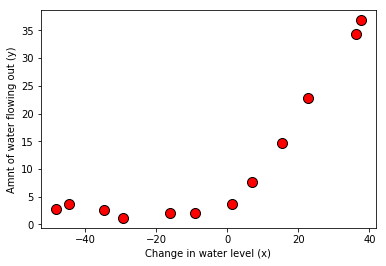

In [2]:
#Regularized linear regression
#We will visualize the data containing historical records on change in the water level x,
#and the amount of water flowing out y from the dam.

#we will form training set,cross validation set and test set and try to fit a st line using 
#linear regression to the traing data.After that we will try to fit a polynomial logistic regression to 
#better fit the data

data = loadmat(os.path.join("C:/Users/dynam/Desktop/Coursera AndrewNg/machine-learning-ex5/machine-learning-ex5/ex5/" + "ex5data1.mat"))
X,y = data["X"],data["y"][:,0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

#m = #training examples
m = y.size

#plotting traing data
plt.plot(X,y,"ro",ms = 10,mec = 'k',mew = 1)
plt.xlabel("Change in water level (x)")
plt.ylabel("Amnt of water flowing out (y)")
plt.show()

In [3]:
def linearRegressionCostFunction(X,y,theta,lambda_ = 0.0):
    '''
    Compute cost and gradient for regularized linear regression with multiple variables.
    It computes the cost for using theta as the parameter.
    
    X : (m,n+1)
    y : (m,)
    theta : (n+1,)
    lambda_ : float : regularixation paramter
    
    J : float cost
    grad : (n+1,) : derivative of cost function wrt theta
    '''
    
    m = y.shape[0]
    J = 0
    grad = np.zeros(theta.shape)
    hThetaOfX = np.dot(X,theta)
    #no need of regularization for theta not term
    J = (1/(2*m))*np.sum(np.square(hThetaOfX - y)) + (lambda_/(2*m))*np.sum(np.square(theta[1:]))
    grad = (1/m)*np.dot((hThetaOfX-y),X)
    grad[1:] = grad[1:] + (lambda_/m)*theta[1:]
    return J,grad

In [4]:
theta = np.array([1,1])
J,grad = linearRegressionCostFunction(np.concatenate([np.ones((m,1)),X],axis = 1),y,theta,1)

print("Cost at theta = [1,1] is : {}".format(J))
print("Gradient at theta = [1,1] is ")
print(grad)

Cost at theta = [1,1] is : 303.9931922202643
Gradient at theta = [1,1] is 
[-15.30301567 598.25074417]


In [5]:
#Next we will need to compute the optimal values of theta
#the training function will use scipy's optimization model to minimize the cost fucntion
#we will set lambda_ = 0 since degree od our hypothesis is 2 and regulaization will not help when degree
#is so low

def trainLinearReg(linearRegressionCostFunction,X,y,lambda_ = 0.0,maxiter = 200):
    '''
    Trains liner regression using scipy optimize.minimize
    
    X (m,n+1)
    y (m,)
    
    returns : Theta (n+1,)
    '''
    init_theta = np.zeros(X.shape[-1])
    
    #create a shorthand for linear regressionCost function
    #costFunction only takes maxiter as input
    costFunction = lambda t: linearRegressionCostFunction(X,y,t,lambda_)
    
    options = {"maxiter" : maxiter}
    res = optimize.minimize(costFunction,init_theta,jac=True,method="TNC",options=options)
    return res.x

In [6]:
X_aug = np.concatenate([np.ones((m,1)),X],axis = 1)
theta = trainLinearReg(linearRegressionCostFunction,X_aug,y,lambda_=0)

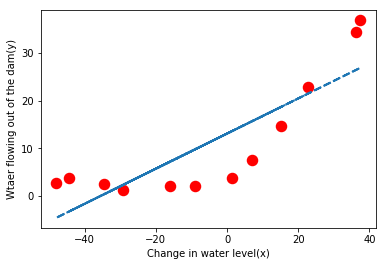

In [7]:
#plot fit over the data
plt.plot(X,y,"ro",ms = 10,mew = 1.5)
plt.xlabel("Change in water level(x)")
plt.ylabel("Wtaer flowing out of the dam(y)")
hypothesis = np.dot(X_aug,theta)
plt.plot(X,hypothesis,"--",lw = 2);

In [8]:

#bias - underfit
#variace - overfit

#learning curves plot trainimg error and cross validation error as a function of the training set size
#function LearningCurve should return a vector of errors for trainig and validation set
#To plot learning curves,we need to calc training and cross validation set error for dofferent set sizes
#To obtain different set sizes,we should use different subsets of original training set X
#Training error does not include regularization term and is not calculated on the entire training set.
#For CV error should be calculated over the entire CV set.

def learningCurve(X, y, Xval, yval, lambda_=0):
    """
    Generates te train and cross validation set errors needed to plot learning curve against number of
    training data provided.
    Returns the training and cross validation set errors.
    
    X (m,n+1)
    y (m,)
    Xval (m_val,n+1)
    yval (m_val,)
    
    Returns:
    error_train (m,) where error_train[i] corresponds to ith example training error
    error_val : (m,) where error_val[i] corresponds to the oith example val error
    """
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    
    for i in range(1, m + 1):
        #We use unregularized cost function to plot training and CV curves because
        #the parameter theta is learned using regularization parameter.
        #hence we don't need to include it twice again while caculating the training and val error.
        theta_t = trainLinearReg(linearRegressionCostFunction, X[:i], y[:i], lambda_ = lambda_)
        error_train[i - 1], _ = linearRegressionCostFunction(X[:i], y[:i], theta_t, lambda_ = 0)
        error_val[i - 1], _ = linearRegressionCostFunction(Xval, yval, theta_t, lambda_ = 0)
        
    # =============================================================
    return error_train, error_val
    
    

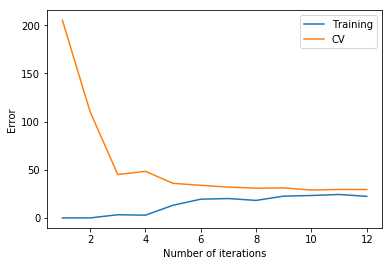

In [9]:
#visulaize the leanring curve
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)

error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)
xAxis = np.arange(1,m+1)
plt.plot(xAxis,error_train)
plt.plot(xAxis,error_val)
plt.legend(["Training","CV"])
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

In [10]:
"""As the number of samples exposed increases,it becomes tougher for the linear function to fit 
all th data features,hence we get to know its a underfit or high bias problem.Hence we use use polynomial regression to fit the data since it can have higher degree features.
Hence we will add more features,where the features are higher powers of the existing feature(water level)."""

'As the number of samples exposed increases,it becomes tougher for the linear function to fit \nall th data features,hence we get to know its a underfit or high bias problem.Hence we use use polynomial regression to fit the data since it can have higher degree features.\nHence we will add more features,where the features are higher powers of the existing feature(water level).'

In [11]:
def polyFeatures(X,p):
    """
    Maps 1D feature vect X into the p-th power for polyniomial features
    X (m,)
    p : int
    
    RETURNS: 
    X_poly : (m,p) where p is the polynomial power ie :
    X_poly[i,:] = [X[i],X[i]**2,X[i]**3 .... X[i]**p]
    """
    m = X.shape[0]
    X_poly = np.zeros((m,p))
    for i in range(p):
        #adding columns of polynomial power of X[:,0]
        X_poly[:,i] = X[:,0]**(i+1)
    return X_poly   

In [12]:
def featureNormalize(X):
    zhi = np.mean(X,axis = 0) #mean of features
    X_norm = X - zhi
    
    #standard deviation of X_norm
    sigma = np.std(X_norm,axis = 0,ddof = 1)
    X_norm /= sigma
    return X_norm,zhi,sigma
#we use feature scaling to normalize large range of values like 40^8

In [13]:
p = 8
#map polynomial for train,test,validate
X_polly = polyFeatures(X,p)
X_polly,mu,sigma = featureNormalize(X_polly)
X_polly = np.concatenate([np.ones((m,1)),X_polly],axis = 1)

In [14]:
X_polly_test = polyFeatures(Xtest,p)
X_polly_test -= mu
X_polly_test /= sigma
X_polly_test = np.concatenate([np.ones((ytest.size,1)),X_polly_test],axis = 1)

In [15]:
X_polly_val = polyFeatures(Xval,p)
X_polly_val -= mu
X_polly_val /= sigma
X_polly_val = np.concatenate([np.ones((ytest.size,1)),X_polly_val],axis = 1)

In [16]:
print("normalized Trainling Example1:")
X_polly[0,:]

normalized Trainling Example1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

In [17]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    Plots the learned polynomial fit with power p and feature normalization (mu, sigma).
    Parameters
    ----------
    polyFeatures : func
        A function which generators polynomial features from a single feature.
    min_x : float
        The minimum value for the feature.
    max_x : float
        The maximum value for the feature.
    mu : float
        The mean feature value over the training dataset.
    sigma : float
        The feature standard deviation of the training dataset.
    theta : array_like
        The parameters for the trained polynomial linear regression.
    p : int
        The polynomial order.
    """
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # we pot the hypothesis for trained parameters and new X_poly values generated
    #between the min and max range
    pyplot.plot(x, np.dot(X_poly, theta), '--', lw=2)

(-20, 50)

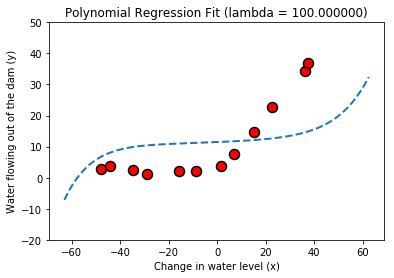

In [24]:
#even though we have polynomial features,we are still dealing with a linear regression 
#oprtimization problem
#if we use lambda_ = 0,then there will be overfitting.Hence we will use lambda_ = 100
from matplotlib import pyplot
lambda_ = 100
theta = trainLinearReg(linearRegressionCostFunction, X_polly, y,
                             lambda_=lambda_, maxiter=55)
# Plot training data and fit together
pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])

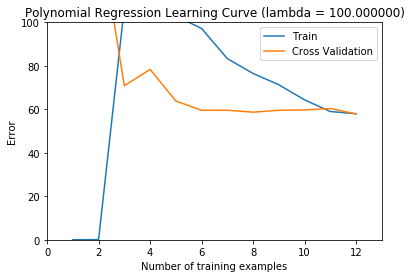

In [29]:
#Training and CV errors for lambda_ = 100
pyplot.figure()
error_train, error_val = learningCurve(X_polly, y, X_polly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100]) #max and min values on x and y axis
pyplot.legend(['Train', 'Cross Validation'])

In [27]:
print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

Polynomial Regression (lambda = 100.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.114107	144.125230
  	3		106.956580	70.863286
  	4		121.740879	78.372963
  	5		102.949459	63.845046
  	6		97.169857	59.532632
  	7		83.326539	59.585493
  	8		76.491825	58.699842
  	9		71.297176	59.564455
  	10		64.350636	59.731344
  	11		58.997943	60.409869
  	12		57.977080	57.842195


In [38]:
#Now we will see how the regularization parameter affects the bias-variance of regularized 
#polynomial regression.We will try lambda_ = 1,100.
#For lambda_ = 1 it will have good trade-off between high bias and high variance.
#Let us use a CV set to select a good lambda_ value
#after selecting a good lambda_ value we can use the test set to see how well it generalizes on 
#test data set

def validationCurve(X,y,Xval,yval):
    '''
    Generates a trnng and validation errors for selected lambda_.
    X (m,n) where n is the # parameters including the olynomial features
    y (m,)
    Xval (mval,n)
    yval (m_val)

    '''
    
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    
    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        #calculate ptraining parameter for each lambda_ value
        theta_try = trainLinearReg(linearRegressionCostFunction,X,y,lambda_=lambda_try)
        
        #lambda_ = 0 as we have found out theta_Try using a aprticluar lambda_ value
        error_train[i],_ = linearRegressionCostFunction(X,y,theta_try,lambda_ = 0)
        error_val[i],_ = linearRegressionCostFunction(Xval,yval,theta_try,lambda_ = 0)
    return lambda_vec,error_train,error_val

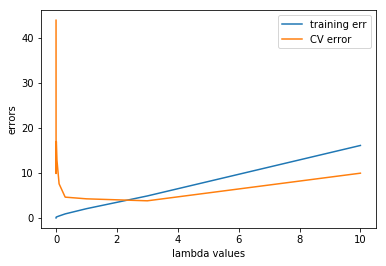

In [39]:
#run the function to get error of training and val over dofferent lambda_ values
lambda_vec,error_train,error_val = validationCurve(X_polly,y,X_polly_val,yval)
pyplot.plot(lambda_vec,error_train,label = "training err")
pyplot.plot(lambda_vec,error_val,label = "CV error")
pyplot.xlabel("lambda values")
pyplot.ylabel("errors")
pyplot.legend()
plt.show()

In [36]:
#values of training and val idation errors

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

lambda		Train Error	Validation Error
 0.000000	0.029686	0.029686
 0.001000	0.112684	0.112684
 0.003000	0.170937	0.170937
 0.010000	0.221505	0.221505
 0.030000	0.281840	0.281840
 0.100000	0.459324	0.459324
 0.300000	0.921763	0.921763
 1.000000	2.076201	2.076201
 3.000000	4.901371	4.901371
 10.000000	16.092273	16.092273


In [ ]:
#Now we will evaluate the model with different lambda_ values on the test set
#to see how it generalizes on unseen data
#hence we need to test the model against the test data as its not used for determining the reg term
#lambda_ nor it is used for training the paramter theta